In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


# Loading the data into panda data frame

In [2]:
car = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

# Exploring the data

In [3]:
# top 5 rows
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# number of rows, columns, data types and missing values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
# numerical data info
car.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
# categorical data
car_cat = car.select_dtypes(include='object').columns.to_list()
for fe in car_cat:
    print(fe + ": ")
    print(car[fe].unique())

Levy: 
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784' '1024' '1357' '

# Data Cleaning

**Levy feature should be int type and it has some values '-', which should be nulled**

In [7]:
car["Levy"].replace({'-': np.nan}, inplace=True)
car["Levy"] = car["Levy"].astype(float)

**Leather interior has been turned "Yes" to 1 and "No" to 0**

In [8]:
car["Leather interior"].replace(["Yes", "No"], [1,0], inplace=True)

**Engine volume separated with two columns**<br>
-> one have the turbo true false value <br>
-> another have the actual volume with data type float <br>

In [9]:
car["Engine volume"] = car["Engine volume"].str.lower()
car["Turbo"] = car["Engine volume"].str.contains("turbo")
car["Engine volume"] = car["Engine volume"].str.split().str.get(0).astype(float)

**Mileage**<br>
-> removed km and turned data type to int<br>

In [10]:
car["Mileage"] = car["Mileage"].str.split().str.get(0).astype(int)

**Doors**<br>
-> replaced "04-May":4, "02-Mar":2, ">5":5 and data type to int

In [11]:
car["Doors"].replace({"04-May":4, "02-Mar":2, ">5":5}, inplace=True)

**ID column dropped**

In [12]:
car.drop(labels="ID", axis=1, inplace=True)

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  int64  
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [14]:
car.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.923700e+04,13418.000000,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,906.838128,2010.912824,0.725373,2.307990,1.532236e+06,4.582991,3.925872,6.582627
std,1.905813e+05,461.867051,5.668673,0.446338,0.877805,4.840387e+07,1.199933,0.403399,4.320168
min,1.000000e+00,87.000000,1939.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,640.000000,2009.000000,0.000000,1.800000,7.013900e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,781.000000,2012.000000,1.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000
75%,2.207500e+04,1058.000000,2015.000000,1.000000,2.500000,1.888880e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,1.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


# Removing outliers
**IQR method**<br>
This code is taken from https://www.kaggle.com/code/ahmetcalis/car-price-prediction?scriptVersionId=108733790&cellId=32

In [15]:
def detect_outliers(df, features, thold):
    outlier_indices = []
    
    for fe in features:
        # 1st quartile or 25%
        q1 = np.percentile(df[fe], 25)
        # 3rd quartile or 75%
        q3 = np.percentile(df[fe], 75)
        # IQR formula
        IQR = q3 - q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indices
        outlier_list = df[(df[fe] < q1 - outlier_step) | (df[fe] > q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list)
    
    return outlier_indices

In [16]:
features = ["Price", "Levy", "Mileage"]
outliers = detect_outliers(car, features, 1.5)
car_prep = car.drop(car.loc[outliers].index, axis=0)

In [17]:
car_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17527 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17527 non-null  int64  
 1   Levy              12141 non-null  float64
 2   Manufacturer      17527 non-null  object 
 3   Model             17527 non-null  object 
 4   Prod. year        17527 non-null  int64  
 5   Category          17527 non-null  object 
 6   Leather interior  17527 non-null  int64  
 7   Fuel type         17527 non-null  object 
 8   Engine volume     17527 non-null  float64
 9   Mileage           17527 non-null  int64  
 10  Cylinders         17527 non-null  float64
 11  Gear box type     17527 non-null  object 
 12  Drive wheels      17527 non-null  object 
 13  Doors             17527 non-null  int64  
 14  Wheel             17527 non-null  object 
 15  Color             17527 non-null  object 
 16  Airbags           17527 non-null  int64 

# Visualizing Data

In [18]:
# importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

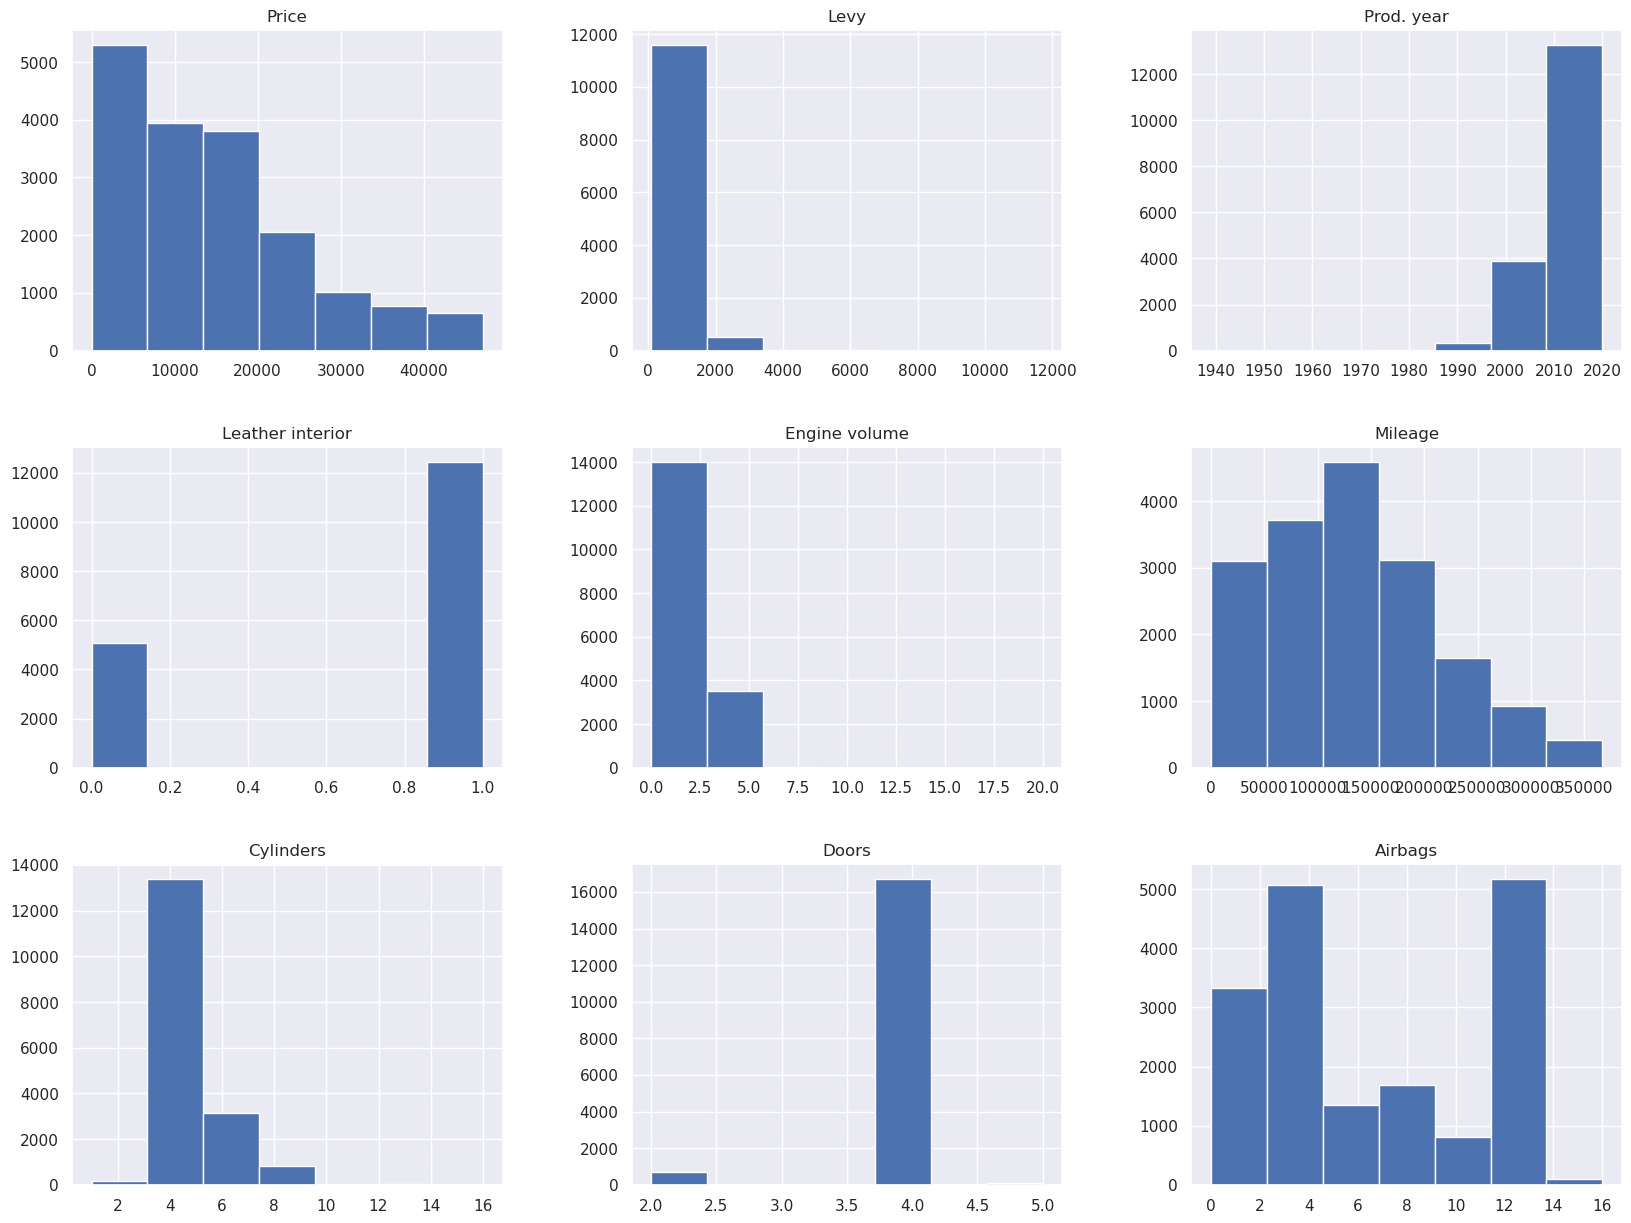

In [19]:
car_prep.hist(bins=7, figsize=(20,15))
plt.show()

**Scatter plots for numerical data**

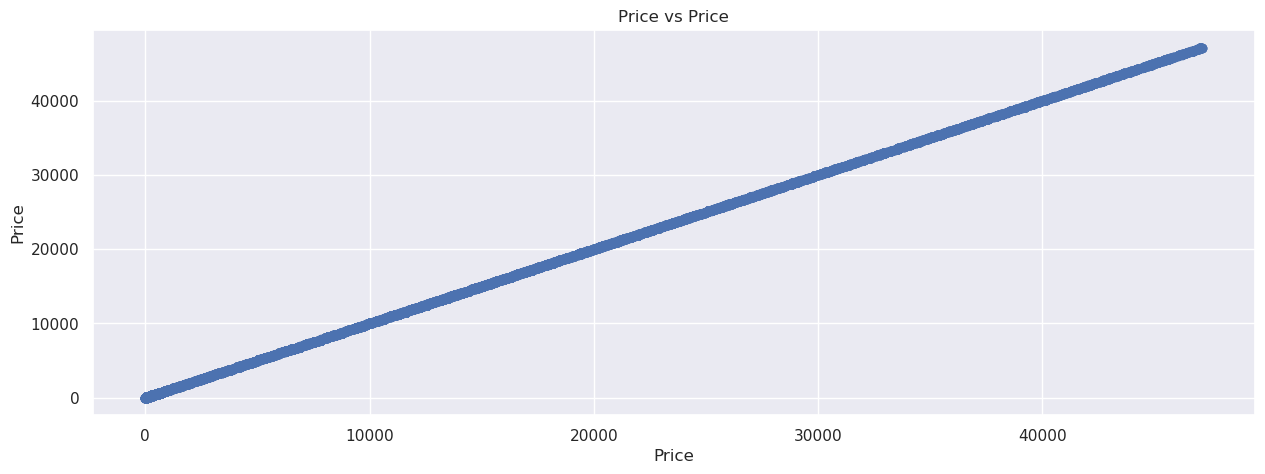

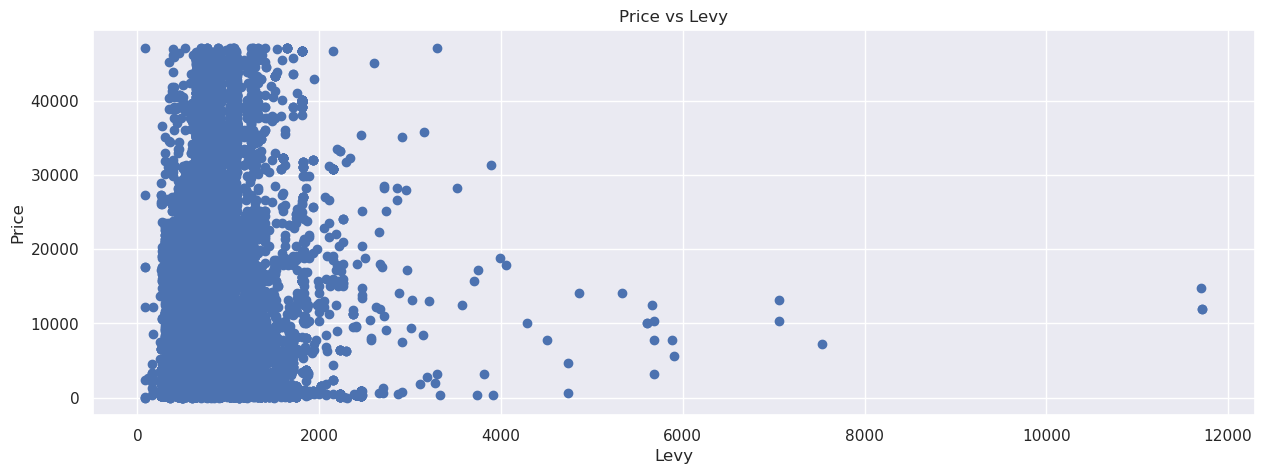

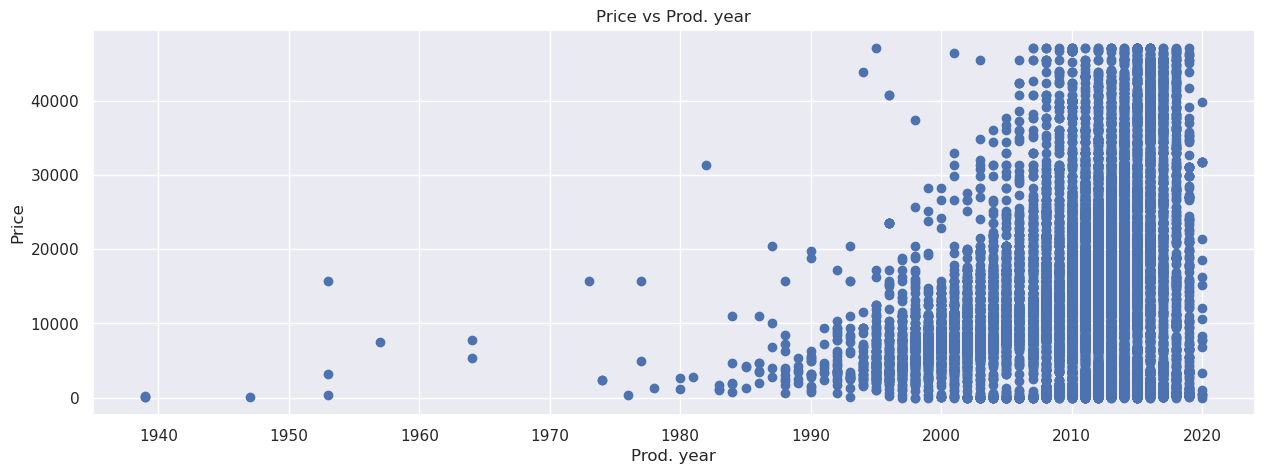

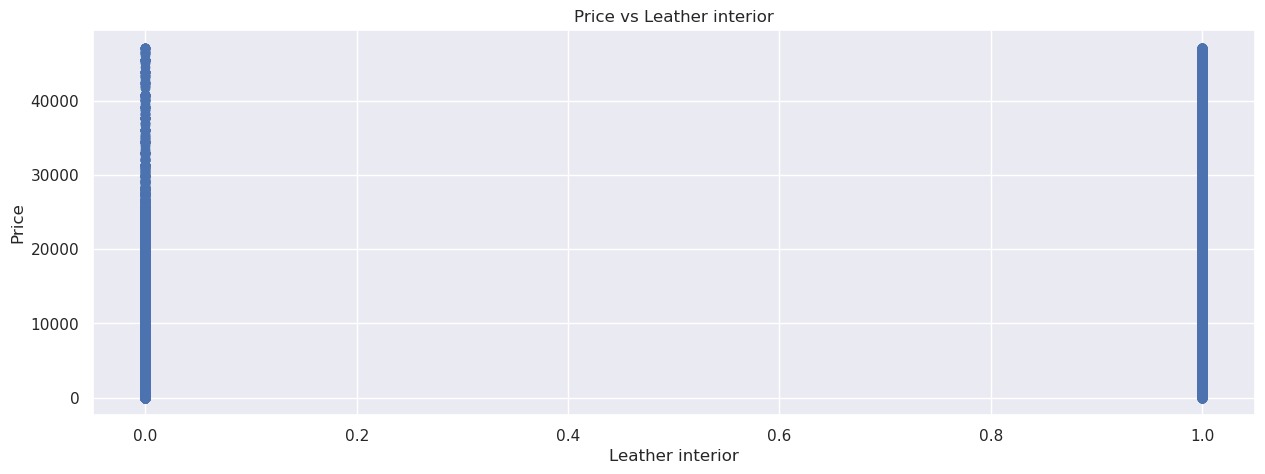

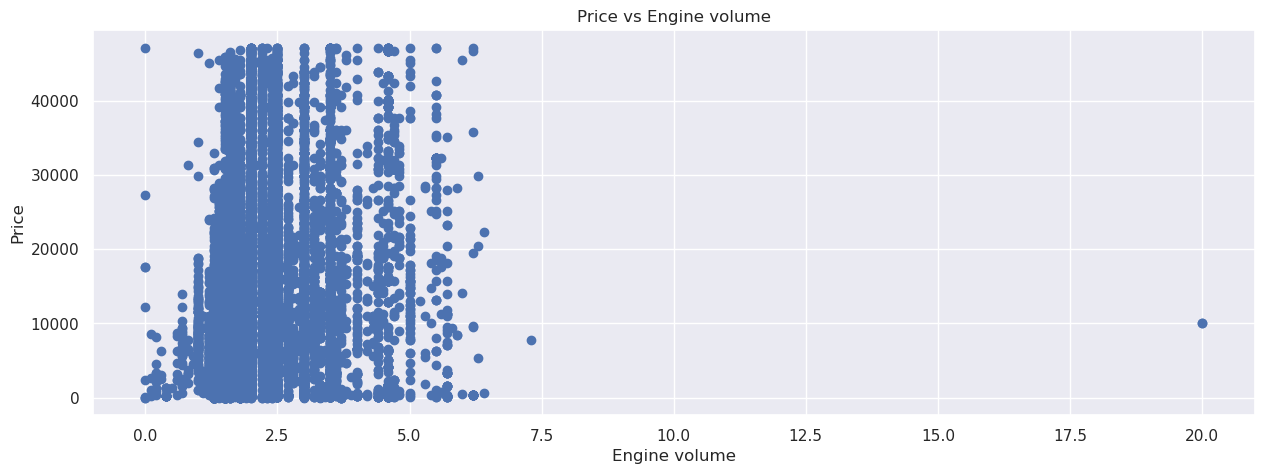

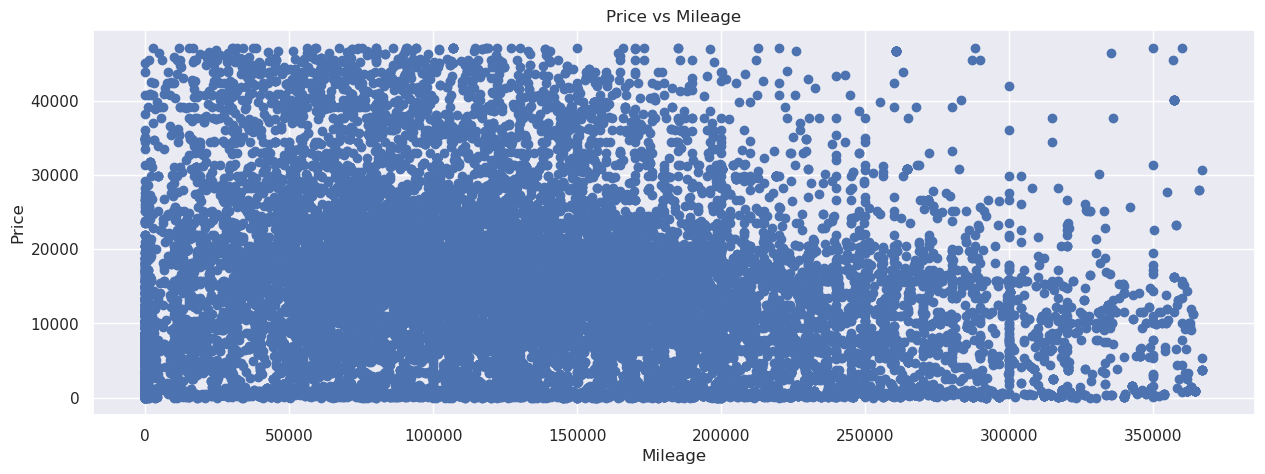

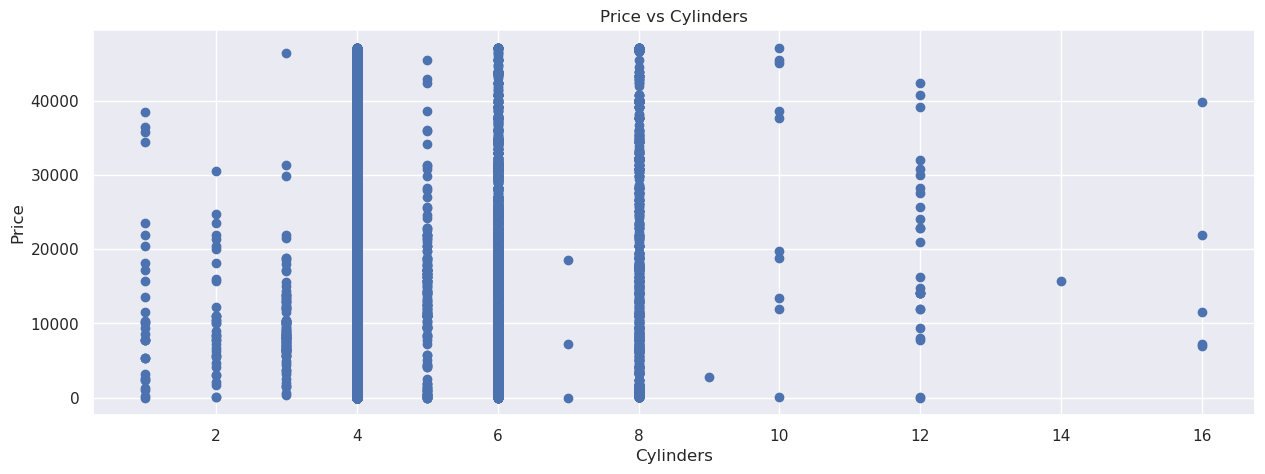

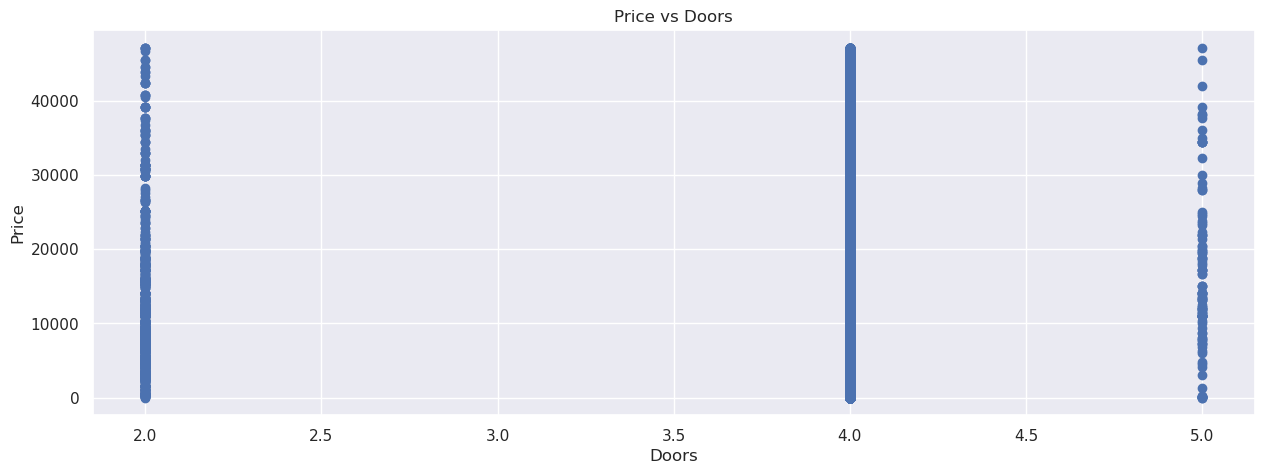

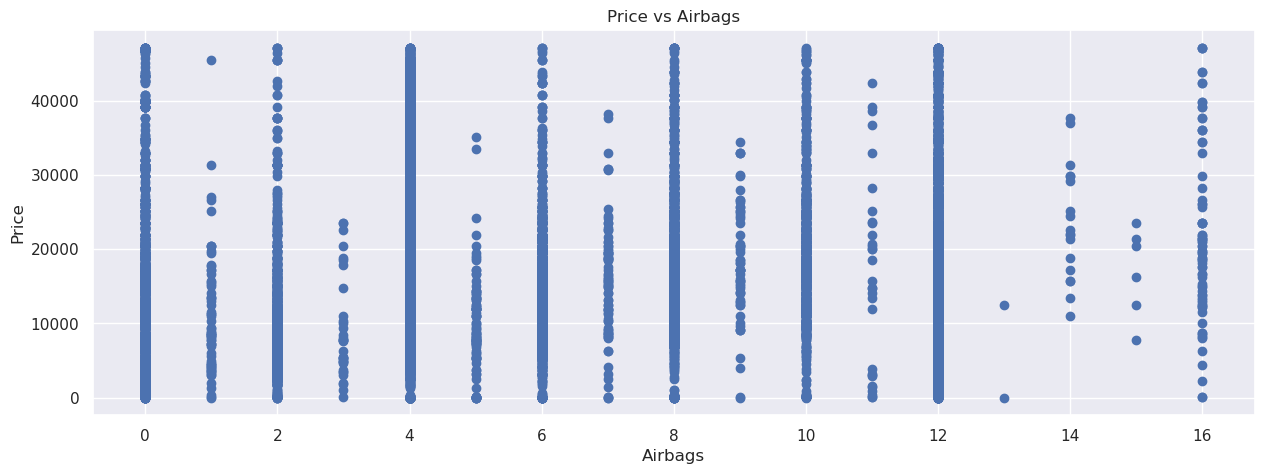

In [20]:
car_num = car_prep.select_dtypes(include="number").columns.to_list()
for col in car_num:
    plt.figure(figsize=(15,5))
    plt.scatter(car_prep[col], car_prep["Price"])
    plt.title("Price vs " + col)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

In [21]:
car_cat = car_prep.select_dtypes(include="object").columns.to_list()
car_cat

['Manufacturer',
 'Model',
 'Category',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

**Top values for categorical data**

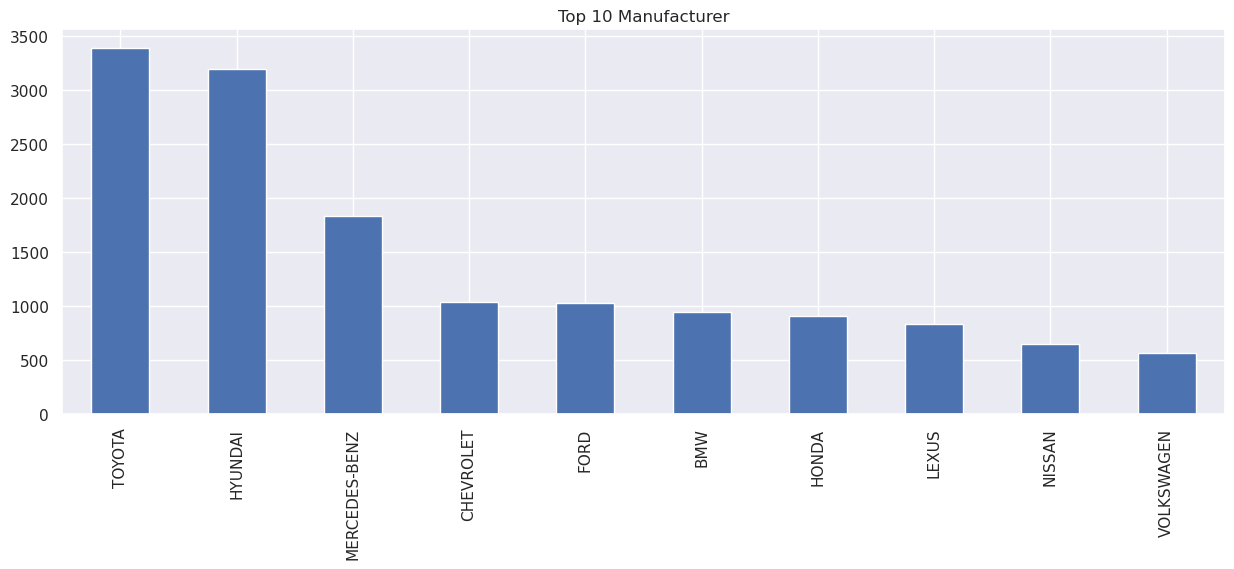

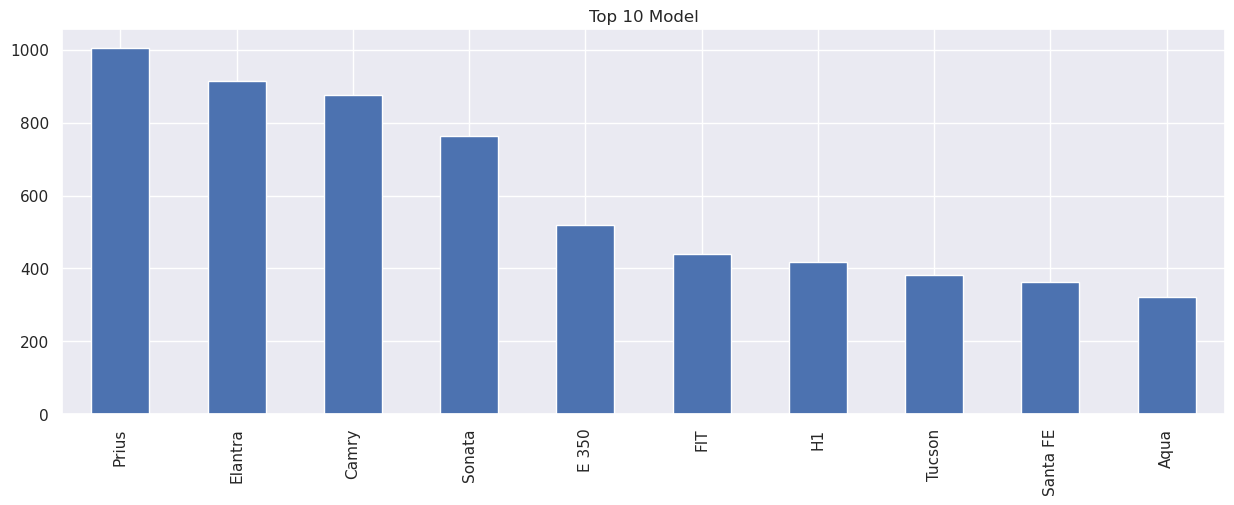

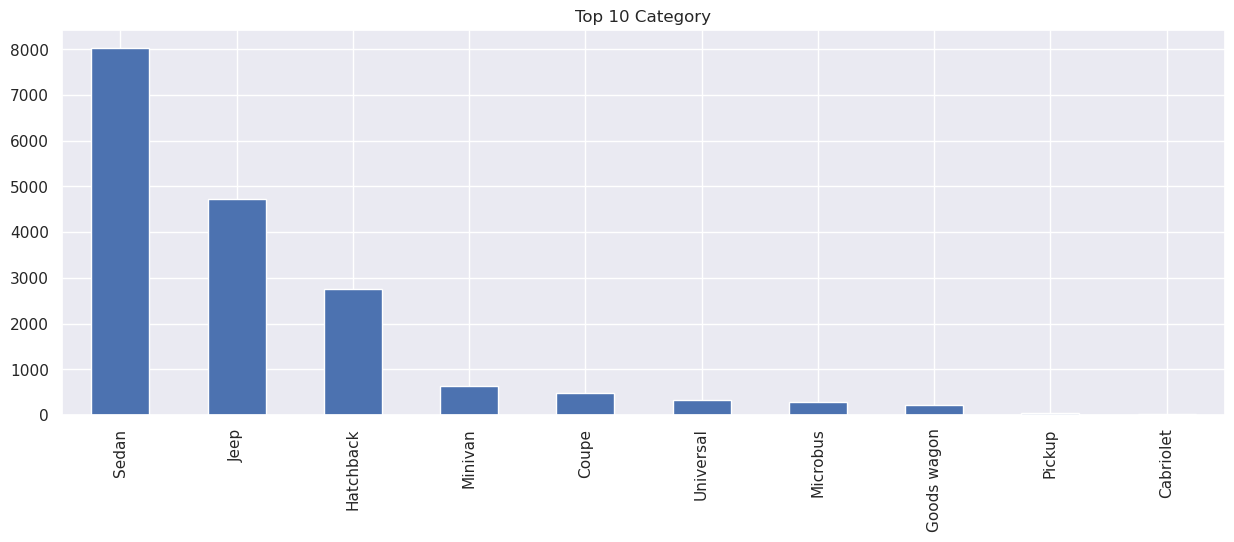

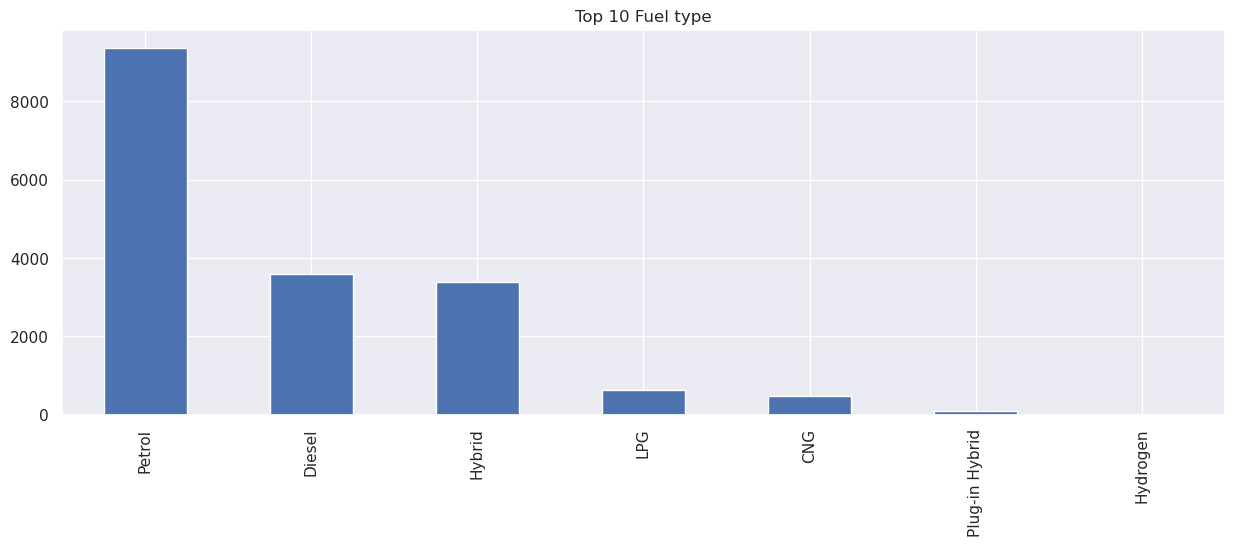

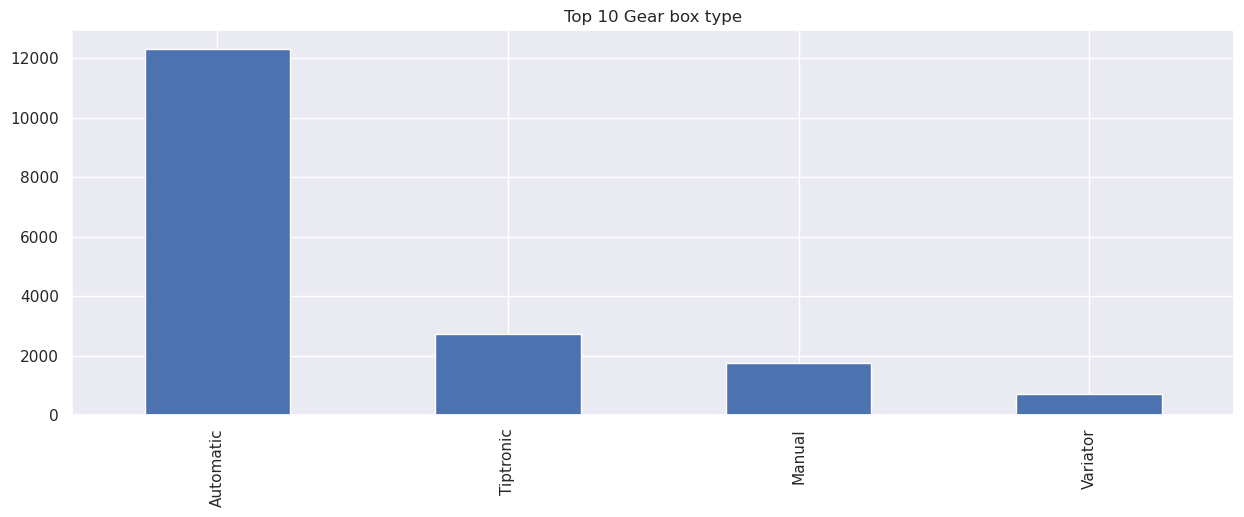

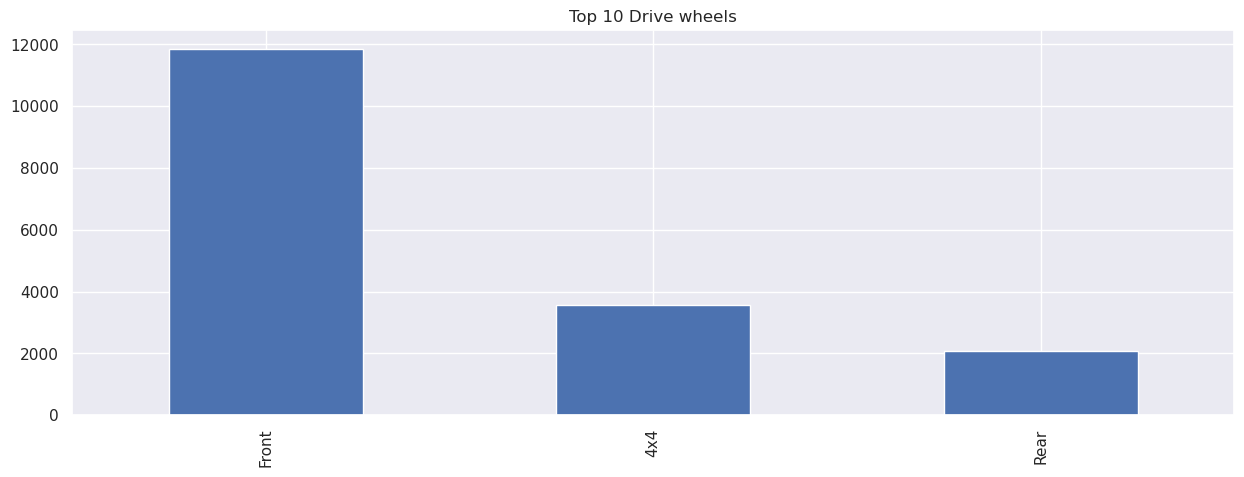

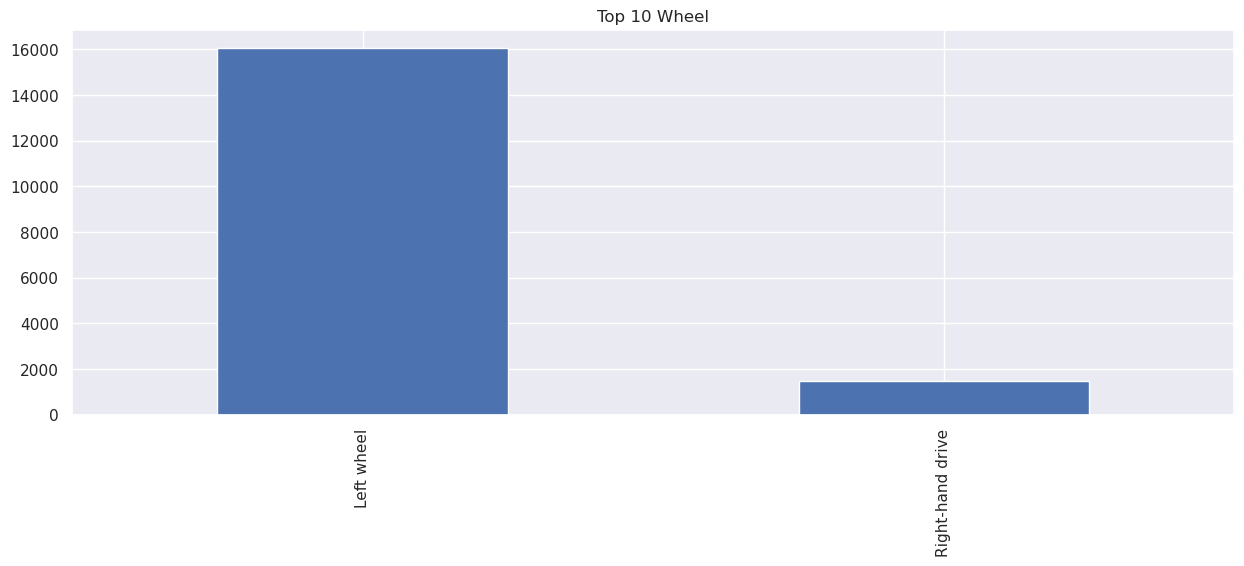

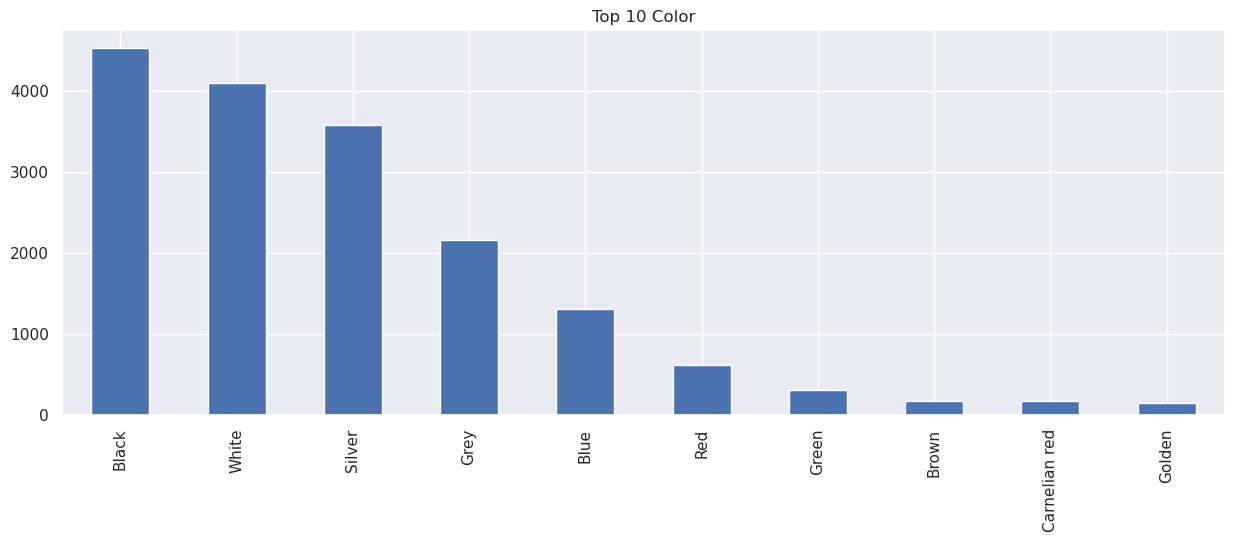

In [22]:
for col in car_cat: 
    plt.figure(figsize=(15,5))
    top10 = car_prep[col].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title("Top 10 " + col)
    plt.show()

**Top values for numerical data**

In [23]:
# "Engine vlume" and "Levy" features are omitted in representation
print(car_num)
attr = ['Price','Prod. year','Leather interior','Mileage','Cylinders','Doors','Airbags']

['Price', 'Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']


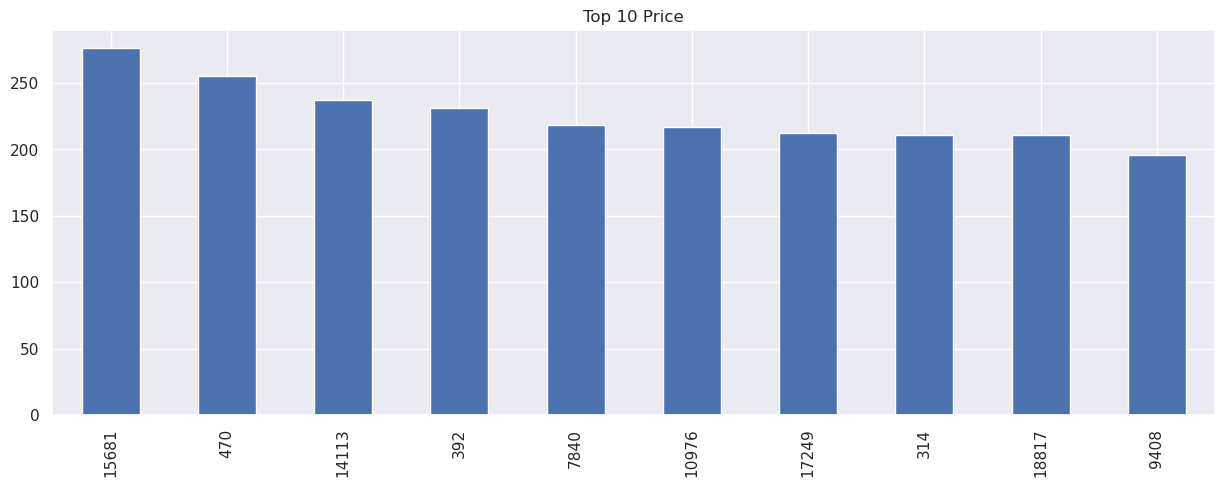

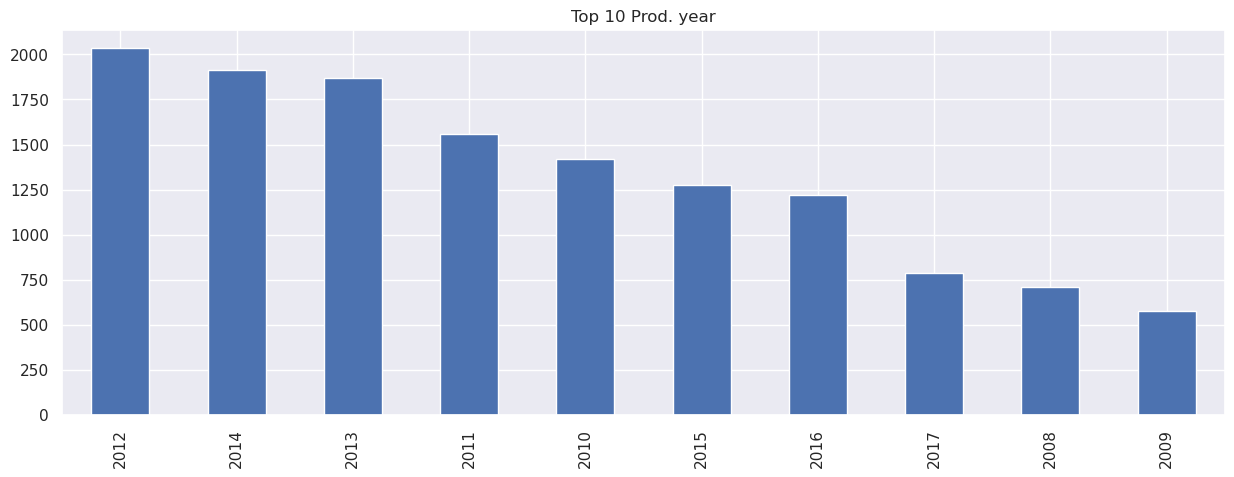

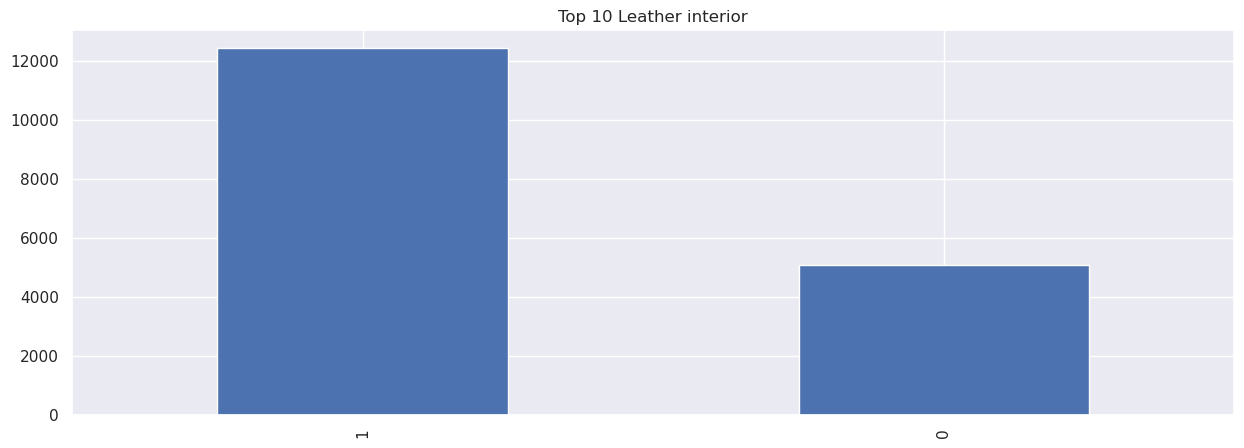

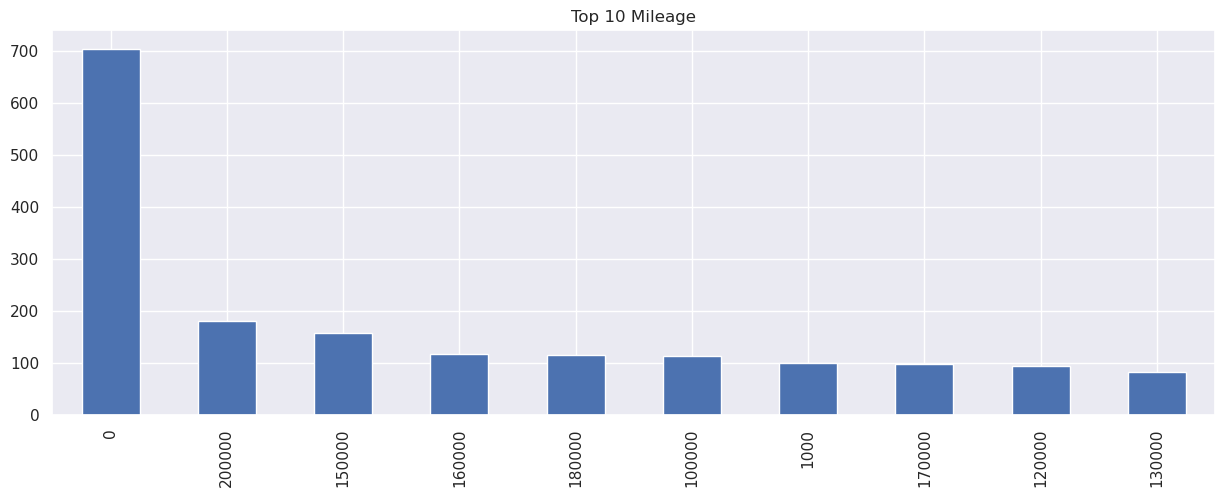

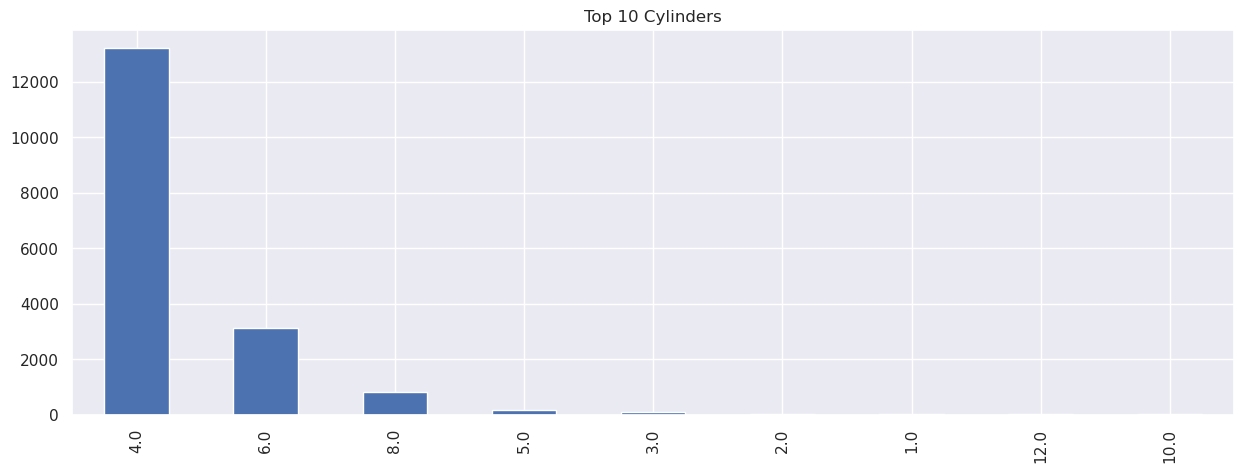

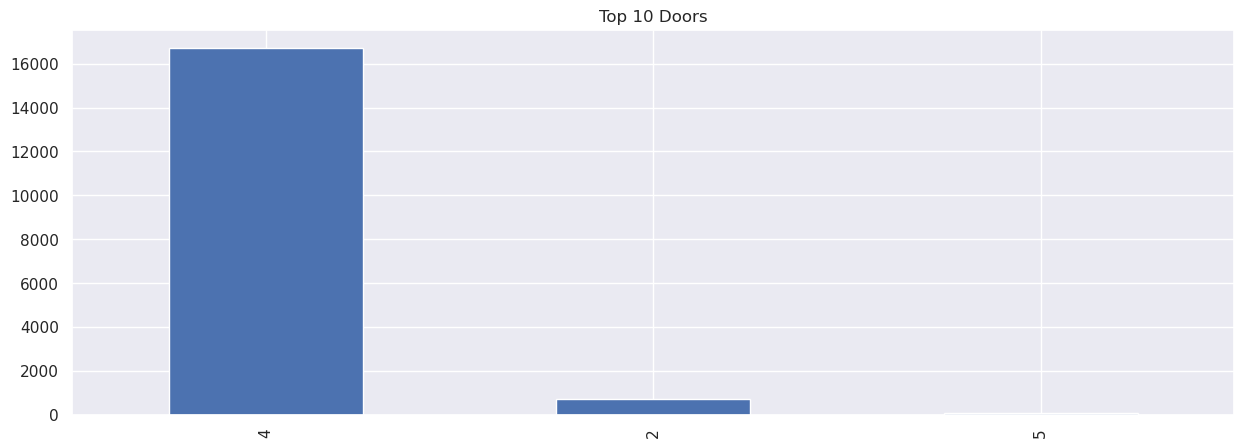

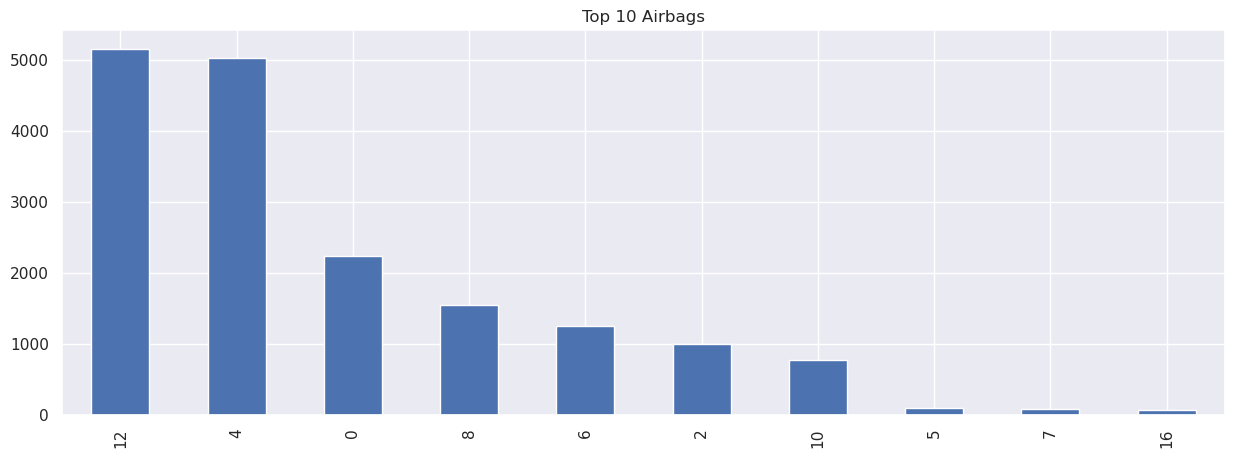

In [24]:
for col in attr: 
    plt.figure(figsize=(15,5))
    top10 = car_prep[col].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title("Top 10 " + col)
    plt.show()

# Looking for co-relations

In [25]:
corr_matrix = car_prep.corr()

In [26]:
corr_matrix["Price"].sort_values(ascending=False)

Price               1.000000
Prod. year          0.265071
Turbo               0.154488
Leather interior    0.077753
Doors               0.026247
Engine volume       0.010460
Cylinders          -0.034800
Levy               -0.063836
Airbags            -0.067156
Mileage            -0.156126
Name: Price, dtype: float64

**Plotting the co-relations**

In [27]:
from pandas.plotting import scatter_matrix

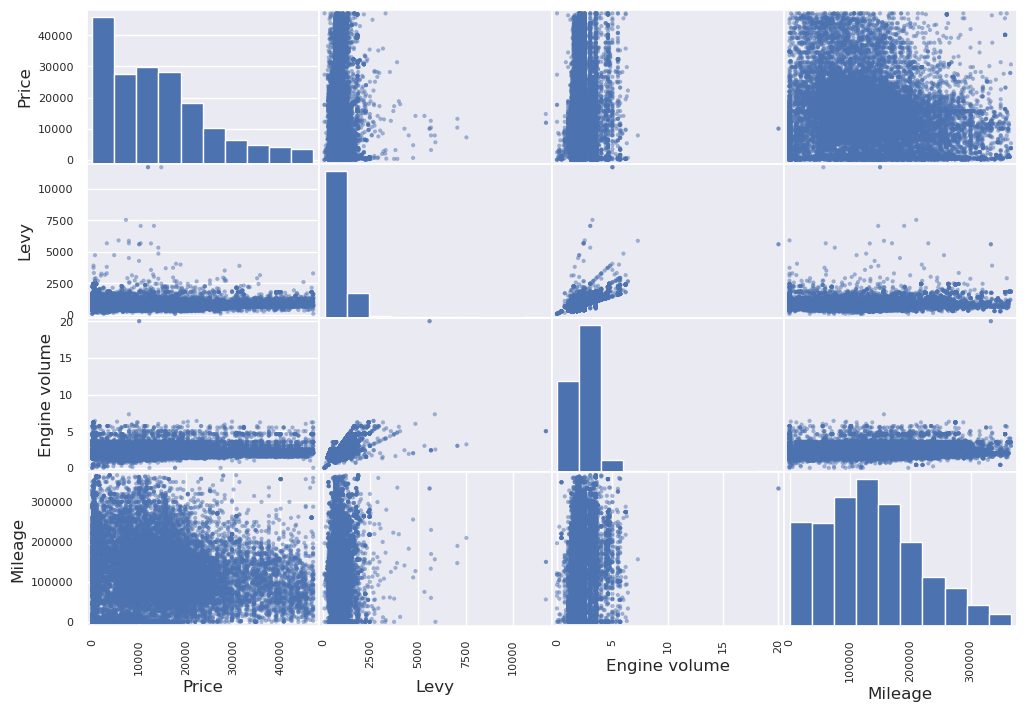

In [28]:
attr = ['Price', 'Levy', 'Engine volume', 'Mileage']
scatter_matrix(car_prep[attr], figsize=(12,8))
plt.show()

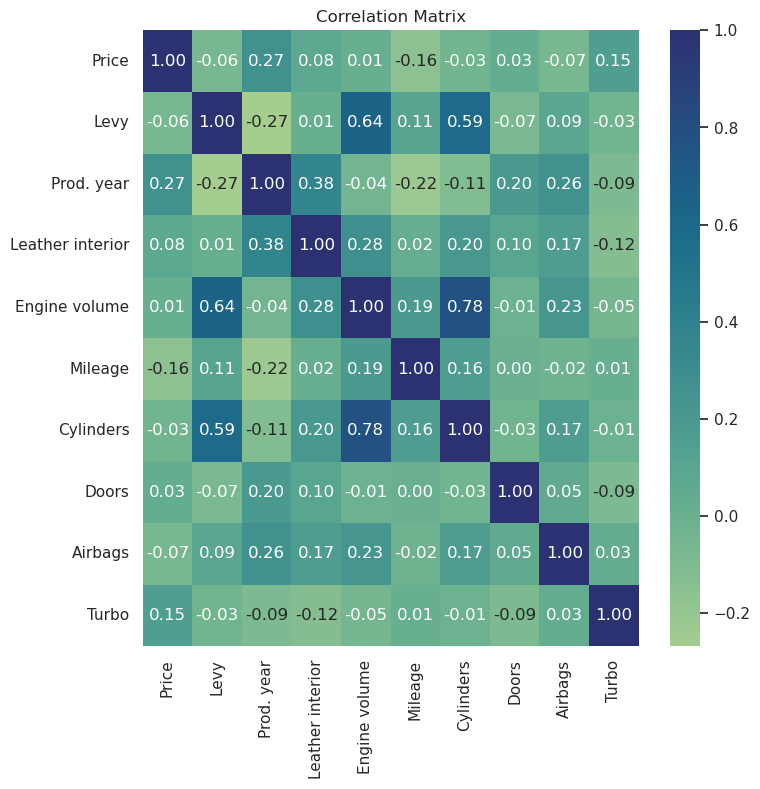

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cbar=True, fmt=".2f", cmap="crest")
plt.title("Correlation Matrix")
plt.show()

In [30]:
car_cat = car_prep.select_dtypes(include='object').columns.to_list()
for fe in car_cat:
    print(fe + ": ")
    print(car[fe].unique())

Manufacturer: 
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Model: 
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']
Category: 
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Fuel type: 
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
Gear box type: 
['Automatic' 'Tiptronic' 'Variator' 'Manual']
Drive wheels: 
['

# Data Pipeline

In [31]:
car_not_cat = car_prep.select_dtypes(exclude='object').columns.to_list()
car_not_cat.remove("Price")
car_not_cat

['Levy',
 'Prod. year',
 'Leather interior',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Doors',
 'Airbags',
 'Turbo']

**-> We will divde our category variable into two parts<br>
-> One will be encoded with One hot encoding another part will be encoded with Target encoding<br>
-> The reason is some categorical features have too many unique values,<br>
-> So, if we do one hot encodin on that features there will be too many useless columns of 0<br>
-> To solve this problem we used Target encoding**

In [32]:
# Features for target encoding
car_cat1 = ["Manufacturer", "Model", "Category", "Color"]
# Features for one hot encoding
car_cat2 = ["Fuel type", "Gear box type", "Drive wheels", "Wheel"]

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config

In [34]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("std_scalar", StandardScaler())
])

In [35]:
full_pipeline = ColumnTransformer([
    ("target_encoder", TargetEncoder(), car_cat1),
    ('num', num_pipeline, car_not_cat),
    ("one_hot_encoder", OneHotEncoder(), car_cat2)
])

In [36]:
set_config(display="diagram")
full_pipeline

ColumnTransformer(transformers=[('target_encoder', TargetEncoder(),
                                 ['Manufacturer', 'Model', 'Category',
                                  'Color']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scalar',
                                                  StandardScaler())]),
                                 ['Levy', 'Prod. year', 'Leather interior',
                                  'Engine volume', 'Mileage', 'Cylinders',
                                  'Doors', 'Airbags', 'Turbo']),
                                ('one_hot_encoder', OneHotEncoder(),
                                 ['Fuel type', 'Gear box type', 'Drive wheels',
                                  'Wheel'])])

In [37]:
car_prep[car_cat]

,Manufacturer,Model,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,CNG,Manual,Rear,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Diesel,Automatic,Front,Left wheel,Black


# Splitting Data into train test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(car_prep.drop("Price", axis=1), car_prep["Price"], test_size=0.2, 
                                                    random_state = 1)

In [39]:
X_train["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'CNG', 'Plug-in Hybrid',
       'Hydrogen'], dtype=object)

# Select and train model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [41]:
# function to show scores
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [42]:
# moodified X_train
X_train_mod = full_pipeline.fit_transform(X_train, y_train)

**Linear Regression**

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_mod, y_train)

LinearRegression()

In [44]:
lin_scores = cross_val_score(lin_reg, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-lin_scores))

Scores:  [8895.33589991 9105.31764705 8852.53508373 8553.94394377 8869.98749359
 9084.37132981 8657.01909329 8662.87402324 8564.04216521 8909.54399854]
Mean:  8815.497067812727
Standard deviation:  188.6526144024579


**Decission tree**

In [45]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train_mod, y_train)

DecisionTreeRegressor()

In [46]:
tree_scores = cross_val_score(dec_tree, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-tree_scores))

Scores:  [7472.3731492  8042.83976048 7989.90470147 7211.44722006 7913.59533132
 7371.70536138 7262.98592122 7287.15816463 7381.79961095 7428.13393067]
Mean:  7536.194315137369
Standard deviation:  302.2815383045558


**Random Forest**

In [47]:
forest = RandomForestRegressor()
forest.fit(X_train_mod, y_train)

RandomForestRegressor()

In [48]:
forest_scores = cross_val_score(forest, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-forest_scores))

Scores:  [5468.50766342 5872.2271935  5612.86775231 5217.01435818 5890.14732996
 5697.24060611 5215.29375251 5362.00188039 5570.19481628 5484.43194892]
Mean:  5538.992730157178
Standard deviation:  226.61644343939358


**Support vector regressor**

In [49]:
# svr = SVR()
# svr.fit(X_train_mod, y_train)

In [50]:
# svr_scores = cross_val_score(svr, X_train_mod, y_train, scoring="neg_mean_squared_error", cv=10)
# display_scores(np.sqrt(-svr_scores))

**-> As we can see Random forest regressor is giving better results and its standard deviation is also low<br>**
**-> So, we would choose Random forest regressor as our model**

# Fine tune model
**Grid Search**

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = [
    {"n_estimators": [30, 100], "max_features": [8, 20]},
    {"bootstrap": [False], "n_estimators": [30, 100], "max_features": [8, 20]}
]

In [53]:
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [54]:
grid_search.fit(X_train_mod, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 20], 'n_estimators': [30, 100]},
                         {'bootstrap': [False], 'max_features': [8, 20],
                          'n_estimators': [30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [56]:
car_ml_model = grid_search.best_estimator_

# Testing model

In [57]:
y_pred = car_ml_model.predict(full_pipeline.transform(X_test))

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
final_mse = mean_squared_error(y_test, y_pred)
final_mse

31774652.98255728

In [60]:
final_rmse = np.sqrt(final_mse)
final_rmse

5636.901008759803

In [61]:
r2_score(y_test, y_pred)

0.7575112076188186

**Over fitting :(**<br>
-> reason may be for target encoding, <br>
-> target encoding have con of overfitting

## Visualizing model's prediction

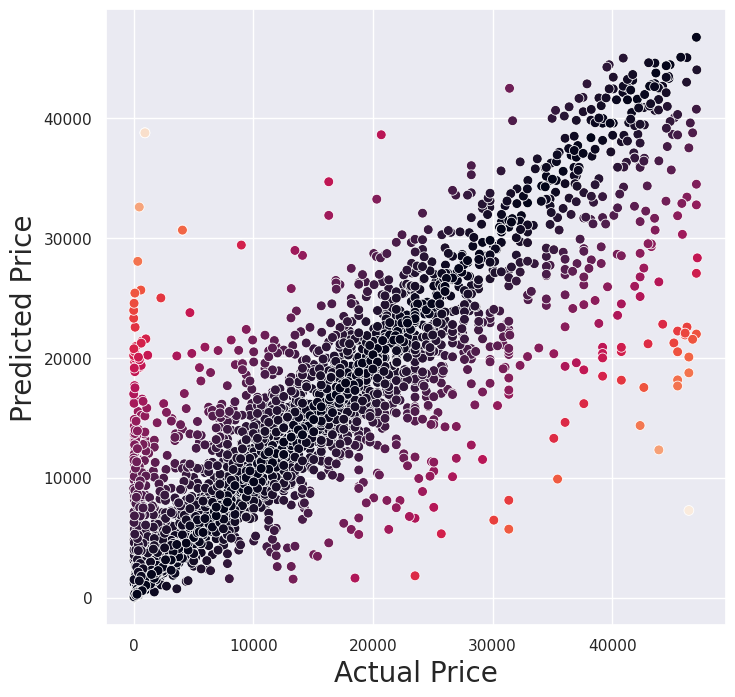

In [62]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, c=abs(y_test - y_pred), s=50) 
plt.xlabel("Actual Price", fontsize=20)
plt.ylabel("Predicted Price", fontsize=20)
plt.show()

**-> From the graph as we can see our model is able to detect most of the car prices, but<br>
-> When the prices are high our model is giving less accuracy.**

# Confidence

In [63]:
from scipy import stats


In [64]:
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
con_res = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))
print(f"Model is 95% confident that its error will be in between {con_res}")

Model is 95% confident that its error will be in between [5342.18946699 5916.9517206 ]
